## STEP 1: PRE-PROCESSING

In [1]:
import pandas as pd
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [7]:
df = pd.read_csv('EmployeeData.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df_selected = df[["Age", "Attrition", "BusinessTravel", 
                  "DailyRate", "Department", "DistanceFromHome", 
                  "Education", "EducationField", "Gender", 
                  "YearsSinceLastPromotion"]]


In [11]:
df_selected.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,Female,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,Male,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,Male,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,Female,3
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,Male,2


In [12]:
age_bins = [0,30, 45, df_selected['Age'].max()]
age_labels = ["Junior", 'Medium', 'Senior']

df_selected.loc[:, 'AgeGroup'] = pd.cut(df_selected["Age"], bins = age_bins, labels = age_labels, right=False)

df_selected = df_selected.drop('Age', axis = 1)

df_selected.head()

C:\Users\rober\AppData\Local\Temp\ipykernel_17644\1666538535.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'AgeGroup'] = pd.cut(df_selected["Age"], bins = age_bins, labels = age_labels, right=False)


,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,YearsSinceLastPromotion,AgeGroup
0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,Female,0,Medium
1,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,Male,1,Senior
2,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,Male,0,Medium
3,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,Female,3,Medium
4,No,Travel_Rarely,591,Research & Development,2,1,Medical,Male,2,Junior


In [13]:
df_encoded = pd.get_dummies(df_selected, drop_first=True)
df_encoded.head()

,DailyRate,DistanceFromHome,Education,YearsSinceLastPromotion,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,AgeGroup_Medium,AgeGroup_Senior
0,1102,1,2,0,True,False,True,False,True,True,False,False,False,False,False,True,False
1,279,8,1,1,False,True,False,True,False,True,False,False,False,False,True,False,True
2,1373,2,2,0,True,False,True,True,False,False,False,False,True,False,True,True,False
3,1392,3,4,3,False,True,False,True,False,True,False,False,False,False,False,True,False
4,591,2,1,2,False,False,True,True,False,False,False,True,False,False,True,False,False


In [14]:
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)

print(df_encoded.dtypes)

DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
YearsSinceLastPromotion              int64
Attrition_Yes                        int32
BusinessTravel_Travel_Frequently     int32
BusinessTravel_Travel_Rarely         int32
Department_Research & Development    int32
Department_Sales                     int32
EducationField_Life Sciences         int32
EducationField_Marketing             int32
EducationField_Medical               int32
EducationField_Other                 int32
EducationField_Technical Degree      int32
Gender_Male                          int32
AgeGroup_Medium                      int32
AgeGroup_Senior                      int32
dtype: object


In [15]:
df_encoded.head()

,DailyRate,DistanceFromHome,Education,YearsSinceLastPromotion,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,AgeGroup_Medium,AgeGroup_Senior
0,1102,1,2,0,1,0,1,0,1,1,0,0,0,0,0,1,0
1,279,8,1,1,0,1,0,1,0,1,0,0,0,0,1,0,1
2,1373,2,2,0,1,0,1,1,0,0,0,0,1,0,1,1,0
3,1392,3,4,3,0,1,0,1,0,1,0,0,0,0,0,1,0
4,591,2,1,2,0,0,1,1,0,0,0,1,0,0,1,0,0


In [16]:
X = df_encoded.drop('Attrition_Yes', axis = 1)
y = df_encoded['Attrition_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
model = xgboost.XGBClassifier().fit(X_train, y_train)

## STEP 2: SHAP LIBRARY

In [18]:
import shap

c:\Users\rober\Desktop\sem5\dupa\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

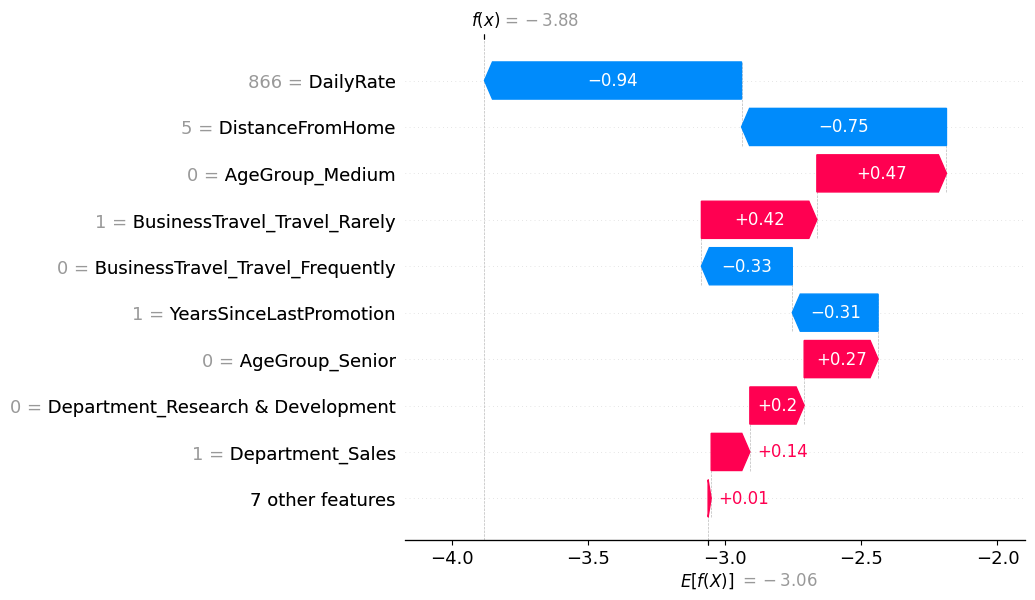

In [20]:
shap.waterfall_plot(shap_values[0])